In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np
from datetime import datetime

In [59]:
df1 = pd.read_csv('tea_demand.csv',sep='\t')
df1

,brand_id,date,receipts_count
0,5152,2016-07-01,98
1,178,2016-07-01,234
2,29,2016-07-01,622
3,5152,2016-07-02,87
4,178,2016-07-02,185
...,...,...,...
454,178,2016-11-29,222
455,29,2016-11-29,1173
456,5152,2016-11-30,311
457,178,2016-11-30,227


## Парсинг

In [60]:
df =pd.read_html('https://www.toramp.com/schedule.php?id=3857')
df_data = []
for i in range(48,-1,-1):
    for index in range(0,len(df[i]['Дата'])):
        df_data.append(df[i]['Дата'][index])
df2 = pd.DataFrame(df_data)
df2.columns = ['Дата']
df2

,Дата
0,4 сентября 1975
1,24 апреля 1976
2,24 декабря 1977
3,14 января 1978
4,2 декабря 1978
...,...
576,19 марта 2023
577,26 марта 2023
578,2 апреля 2023
579,9 апреля 2023


In [61]:
df2.to_csv('Даты проведений передачи.csv')

In [62]:
df2 = pd.read_csv('Даты проведений передачи.csv')['Дата']
df2

0      4 сентября 1975
1       24 апреля 1976
2      24 декабря 1977
3       14 января 1978
4       2 декабря 1978
            ...       
576      19 марта 2023
577      26 марта 2023
578      2 апреля 2023
579      9 апреля 2023
580     16 апреля 2023
Name: Дата, Length: 581, dtype: object

*Был проделан парсинг по всем датам проведения передачи "Что? Где? Когда?"*

## Превращаем данные из строковых в временные данные

In [63]:
data = [value.split(' ') for value in df2]
data_m = pd.DataFrame(data)[1]
data_d = pd.DataFrame(data)[0]
data_num1 = []
for value in data_m:
    if value == 'сентября':
        data_num1.append('09')
    if value == 'апреля':
        data_num1.append('04')
    if value == 'декабря':
        data_num1.append('12')
    if value == 'января':
        data_num1.append('01')
    if value == 'марта':
        data_num1.append('03')
    if value == 'июня':
        data_num1.append('06')
    if value == 'августа':
        data_num1.append('08')
    if value == 'октября':
        data_num1.append('10')
    if value == 'ноября':
        data_num1.append('11')
    if value == 'февраля':
        data_num1.append('02')
    if value == 'июля':
        data_num1.append('07')
    if value == 'мая':
        data_num1.append('05')
data_num1

['09',
 '04',
 '12',
 '01',
 '12',
 '01',
 '03',
 '04',
 '06',
 '08',
 '09',
 '10',
 '11',
 '01',
 '02',
 '04',
 '04',
 '06',
 '07',
 '08',
 '10',
 '11',
 '11',
 '12',
 '03',
 '05',
 '06',
 '07',
 '09',
 '02',
 '03',
 '04',
 '06',
 '07',
 '09',
 '12',
 '12',
 '06',
 '08',
 '09',
 '10',
 '12',
 '12',
 '04',
 '05',
 '08',
 '10',
 '12',
 '12',
 '09',
 '10',
 '12',
 '12',
 '04',
 '05',
 '06',
 '10',
 '11',
 '12',
 '11',
 '11',
 '11',
 '05',
 '06',
 '07',
 '10',
 '11',
 '12',
 '09',
 '10',
 '11',
 '12',
 '12',
 '12',
 '12',
 '12',
 '06',
 '06',
 '06',
 '06',
 '12',
 '12',
 '12',
 '12',
 '06',
 '06',
 '06',
 '06',
 '12',
 '12',
 '12',
 '12',
 '06',
 '06',
 '06',
 '06',
 '07',
 '11',
 '11',
 '12',
 '12',
 '12',
 '12',
 '05',
 '05',
 '06',
 '06',
 '06',
 '06',
 '11',
 '12',
 '12',
 '12',
 '12',
 '01',
 '05',
 '05',
 '06',
 '06',
 '06',
 '06',
 '11',
 '12',
 '12',
 '12',
 '12',
 '12',
 '05',
 '06',
 '06',
 '06',
 '06',
 '06',
 '11',
 '12',
 '12',
 '12',
 '12',
 '12',
 '05',
 '06',
 '06',
 '06',

In [64]:
data_num2 = []
for value in data_d:
    if value == '1':
        data_num2.append('01')
    elif value == '2':
        data_num2.append('02')
    elif value == '3':
        data_num2.append('03')
    elif value == '4':
        data_num2.append('04')
    elif value == '5':
        data_num2.append('05')
    elif value == '6':
        data_num2.append('06')
    elif value == '7':
        data_num2.append('07')
    elif value == '8':
        data_num2.append('08')
    elif value == '9':
        data_num2.append('09')
    else:
        data_num2.append(value)
data_num2

['04',
 '24',
 '24',
 '14',
 '02',
 '25',
 '20',
 '10',
 '14',
 '09',
 '17',
 '25',
 '15',
 '31',
 '28',
 '10',
 '24',
 '05',
 '08',
 '20',
 '03',
 '14',
 '28',
 '26',
 '25',
 '21',
 '25',
 '16',
 '03',
 '10',
 '12',
 '21',
 '01',
 '02',
 '02',
 '02',
 '29',
 '29',
 '12',
 '14',
 '18',
 '07',
 '30',
 '25',
 '30',
 '01',
 '31',
 '01',
 '30',
 '29',
 '26',
 '01',
 '29',
 '12',
 '17',
 '15',
 '24',
 '29',
 '27',
 '14',
 '15',
 '16',
 '07',
 '19',
 '24',
 '02',
 '14',
 '30',
 '17',
 '14',
 '19',
 '31',
 '09',
 '16',
 '23',
 '30',
 '09',
 '16',
 '23',
 '30',
 '08',
 '14',
 '21',
 '28',
 '07',
 '14',
 '21',
 '28',
 '06',
 '13',
 '20',
 '27',
 '06',
 '13',
 '20',
 '27',
 '04',
 '21',
 '28',
 '05',
 '12',
 '19',
 '26',
 '22',
 '29',
 '05',
 '12',
 '19',
 '26',
 '27',
 '04',
 '11',
 '18',
 '25',
 '01',
 '21',
 '28',
 '04',
 '11',
 '18',
 '25',
 '26',
 '03',
 '10',
 '17',
 '24',
 '31',
 '26',
 '02',
 '09',
 '16',
 '23',
 '30',
 '24',
 '01',
 '08',
 '15',
 '23',
 '30',
 '25',
 '01',
 '08',
 '15',

In [65]:
for value1,value2 in zip(data, data_num1):
    value1[0] = value2
for value1,value2 in zip(data, data_num2):
    value1[1] = value2
data = ['-'.join(value) for value in data]
data

['09-04-1975',
 '04-24-1976',
 '12-24-1977',
 '01-14-1978',
 '12-02-1978',
 '01-25-1979',
 '03-20-1979',
 '04-10-1979',
 '06-14-1979',
 '08-09-1979',
 '09-17-1979',
 '10-25-1979',
 '11-15-1979',
 '01-31-1980',
 '02-28-1980',
 '04-10-1980',
 '04-24-1980',
 '06-05-1980',
 '07-08-1980',
 '08-20-1980',
 '10-03-1980',
 '11-14-1980',
 '11-28-1980',
 '12-26-1980',
 '03-25-1981',
 '05-21-1981',
 '06-25-1981',
 '07-16-1981',
 '09-03-1981',
 '02-10-1982',
 '03-12-1982',
 '04-21-1982',
 '06-01-1982',
 '07-02-1982',
 '09-02-1982',
 '12-02-1982',
 '12-29-1982',
 '06-29-1983',
 '08-12-1983',
 '09-14-1983',
 '10-18-1983',
 '12-07-1983',
 '12-30-1983',
 '04-25-1984',
 '05-30-1984',
 '08-01-1984',
 '10-31-1984',
 '12-01-1984',
 '12-30-1984',
 '09-29-1985',
 '10-26-1985',
 '12-01-1985',
 '12-29-1985',
 '04-12-1986',
 '05-17-1986',
 '06-15-1986',
 '10-24-1986',
 '11-29-1986',
 '12-27-1986',
 '11-14-1987',
 '11-15-1987',
 '11-16-1987',
 '05-07-1988',
 '06-19-1988',
 '07-24-1988',
 '10-02-1988',
 '11-14-19

In [66]:
df2 = pd.DataFrame(data)
df2[0] = df2[0].astype('datetime64')
df2.columns = ['Дата']
df2

,Дата
0,1975-09-04
1,1976-04-24
2,1977-12-24
3,1978-01-14
4,1978-12-02
...,...
576,2023-03-19
577,2023-03-26
578,2023-04-02
579,2023-04-09


## Поиск аномалий:

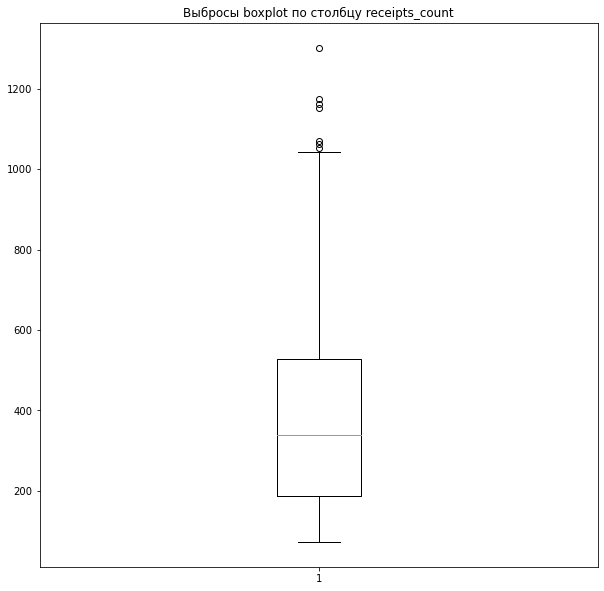

In [67]:
plt.figure(figsize=(10,10))
plt.title('Выбросы boxplot по столбцу receipts_count')
plt.boxplot(df1['receipts_count'])
plt.show()

## Кластеризации точек продаж

In [68]:
Agglomerative = AgglomerativeClustering(n_clusters=3)

In [69]:
df1['prediction'] = Agglomerative.fit_predict(df1['receipts_count'].values.reshape(-1, 1))
df1

,brand_id,date,receipts_count,prediction
0,5152,2016-07-01,98,1
1,178,2016-07-01,234,1
2,29,2016-07-01,622,0
3,5152,2016-07-02,87,1
4,178,2016-07-02,185,1
...,...,...,...,...
454,178,2016-11-29,222,1
455,29,2016-11-29,1173,0
456,5152,2016-11-30,311,2
457,178,2016-11-30,227,1
